In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

##From https://www.kaggle.com/ishandutta/jigsaw-all-competition-eda-at-one-place-model/notebook
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('./data/compiled_data.csv')

In [3]:
df

id                                       comment_text  \
0        0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1        000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2        000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3        0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4        0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                   ...                                                ...   
2237570           7023485  Right on Dennis.  Trump maybe doing nothing mo...   
2237571           7018257  I share the common outrage about this "new pol...   
2237572           7046916  Herod's "slaughter of the innocents" in Matthe...   
2237573           7088523  You don't know that he would kill them if he c...   
2237574           7084928  Homosexuals are NOT pedophiles. The pedophiles...   

         toxic  severe_toxic  obscene  threat  insult  
0          0.0           0.0      0.0     0.0     0.0  
1          0.0           0.0      0.0     0.0     0.0  
2          0.0           0.0      0.0     0.0     0.0  
3          0.0           0.0      0.0     0.0     0.0  
4          0.0           0.0      0.0     0.0     0.0  
...        ...           ...      ...     ...     ...  
2237570    0.4           0.0      0.0     0.0     0.3  
2237571    0.4           0.0      0.0     0.0     0.1  
2237572    0.4           0.0      0.1     0.1     0.3  
2237573    0.4           0.1      0.0     0.2     0.2  
2237574    0.4           0.1      0.1     0.0     0.3  

[2237575 rows x 7 columns]

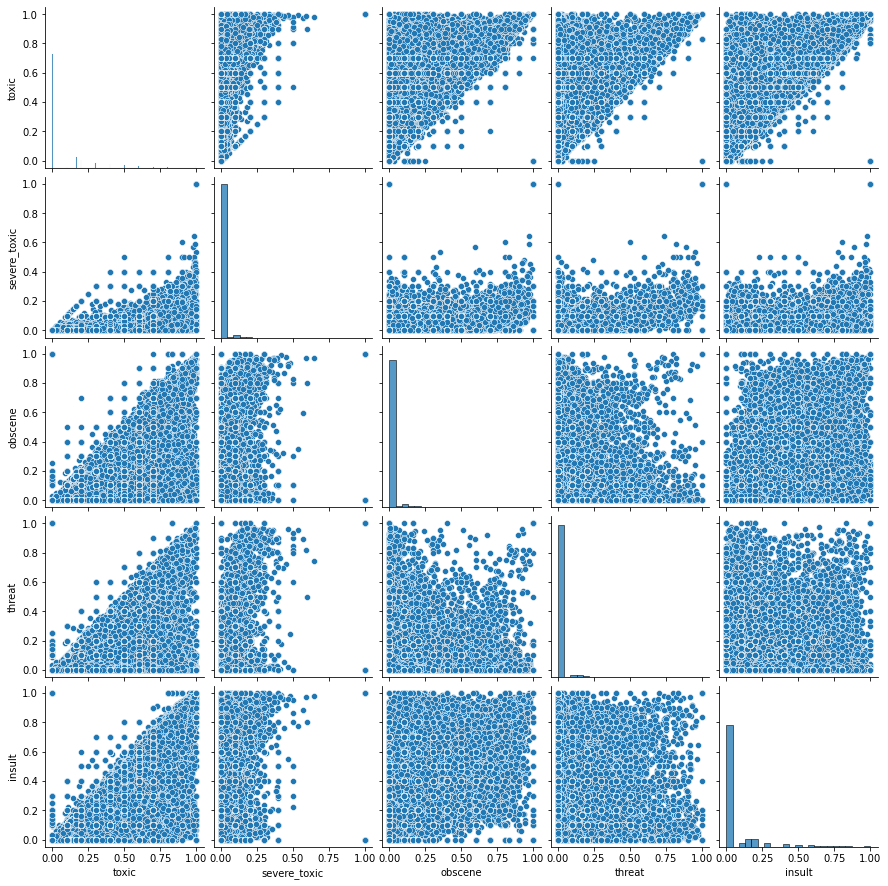

In [4]:
sns.pairplot(df)

In [5]:
corr = df.corr()

In [6]:
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

In [7]:
df.describe()

toxic  severe_toxic       obscene        threat        insult
count  2.237575e+06  2.237575e+06  2.237575e+06  2.237575e+06  2.237575e+06
mean   1.038405e-01  5.084558e-03  1.822683e-02  8.793181e-03  7.944982e-02
std    2.102622e-01  3.673886e-02  9.560763e-02  5.039869e-02  1.826247e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.666667e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

<AxesSubplot:xlabel='toxic', ylabel='Count'>

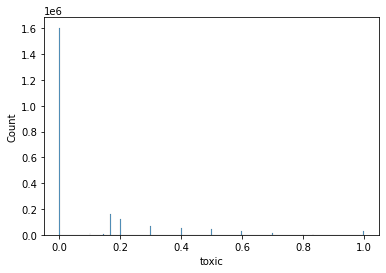

In [8]:
sns.histplot(df.toxic)

In [9]:
text = [str(comment) for comment in df.comment_text if comment not in STOPWORDS]
# text = [str(word) for word in text if word not in STOPWORDS] ##Removing StopWords
text = ' '.join(text)

In [10]:
wordcloud = WordCloud(max_font_size = None, background_color='pink', collocations=False, width = 4000, height = 4000).generate(text)

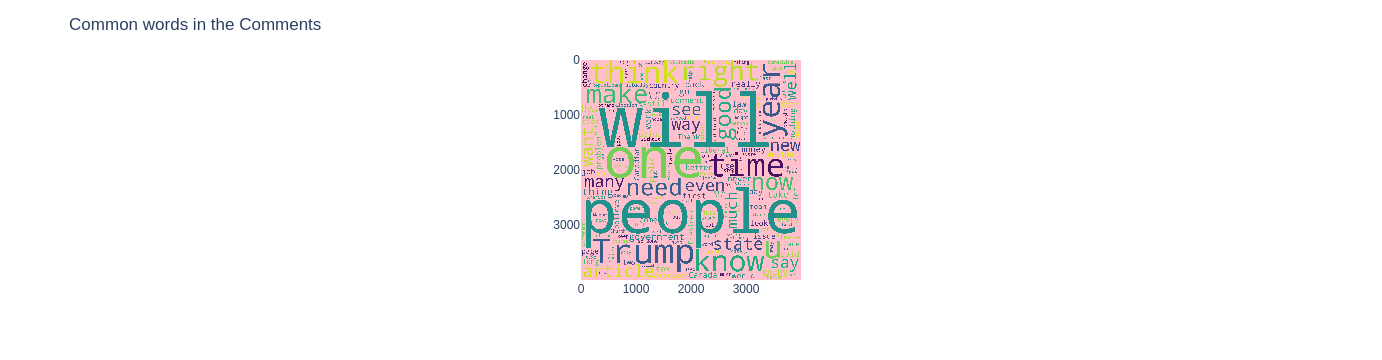

In [11]:
fig = px.imshow(wordcloud)
fig.update_layout(title_text = "Common words in the Comments")
fig.show()